문제 주제: K-Means 클러스터링을 활용한 고객 세분화와 성능 평가



문제 내용:

K-Means 알고리즘을 활용하여 고객 데이터를 학습하고, 모델의 성능을 평가하며 각 클러스터의 특성을 분석하세요.

데이터셋 URL

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data



문제 목표:

데이터 준비

  - 고객 데이터를 불러오고 필요한 열을 선택하여 학습과 테스트 데이터로 분리합니다.

모델 학습

  - 학습 데이터에 대해 K-Means 클러스터링을 수행합니다.

  - 최적의 클러스터 수를 엘보우 방법으로 결정합니다.

모델 테스트

  - 학습된 K-Means 모델을 테스트 데이터에 적용합니다.

  - 테스트 데이터에 대한 클러스터 할당 결과를 확인합니다.

모델 평가

  - 테스트 데이터의 클러스터링 결과를 Silhouette Score로 평가합니다.

결과 시각화

  - 학습 데이터와 테스트 데이터의 클러스터링 결과를 2D 산점도로 시각화합니다.

결과 분석

  - 각 클러스터의 주요 특징을 분석합니다 (예: 소득-소비 패턴 등).



문제 가이드

1. 데이터셋:

  - Mall_Customers.csv 파일을 사용합니다.

  - 주요 열: Annual Income (k$)(연소득), Spending Score (1-100)(소비 점수).

2. 데이터 전처리:

  - 데이터에서 필요한 열만 선택하고, 학습 데이터와 테스트 데이터로 나눕니다.

  - 데이터를 표준화하여 K-Means 알고리즘의 성능을 높입니다.

3. 최적의 클러스터 수 찾기:

  - 엘보우 방법을 통해 관성값(Inertia)을 계산하고, 최적의 클러스터 수를 선택합니다.

4. K-Means 모델 학습 및 테스트:

  - 학습 데이터를 사용하여 K-Means 모델을 학습합니다.

  - 테스트 데이터에 모델을 적용해 클러스터를 할당합니다.

5. 성능 평가 및 시각화:

  - Silhouette Score로 테스트 데이터의 클러스터링 결과를 평가합니다.

  - 학습 데이터와 테스트 데이터를 각각 시각화합니다.

6. 결과 분석:

  - 클러스터별로 소득-소비 패턴의 특징을 분석하고, 비즈니스 활용 방안을 제안하세요.





문제 조건

1. 데이터 분리: 학습 데이터와 테스트 데이터를 80:20 비율로 분리하세요.

2. 표준화: K-Means 알고리즘에 적합하도록 데이터를 표준화하세요.

3. 최적의 클러스터 수: 엘보우 방법의 그래프를 통해 최적의 클러스터 수를 선택하세요.

4. 성능 평가: Silhouette Score를 계산하여 결과를 출력하세요.

5. 결과 분석: 각 클러스터의 특성과 비즈니스 활용 방안을 요약하세요



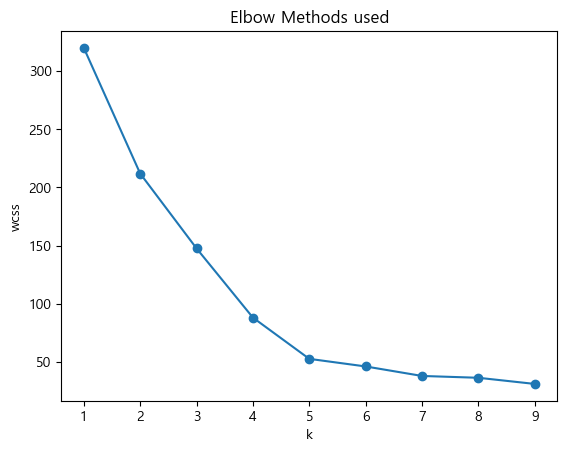

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


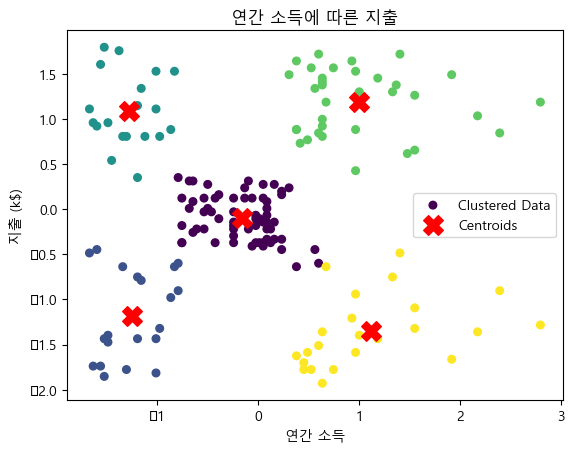

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


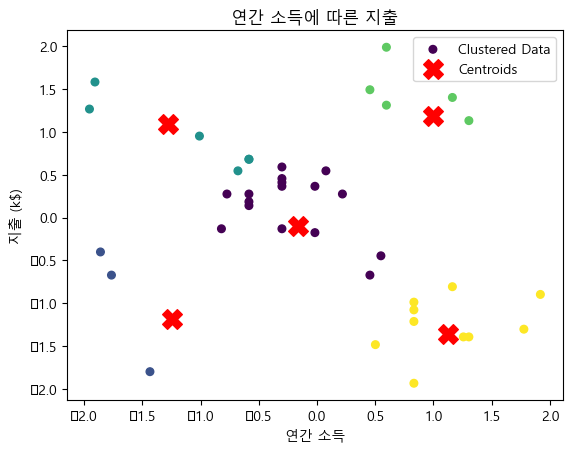

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


OverallSilhouette Score: 0.46


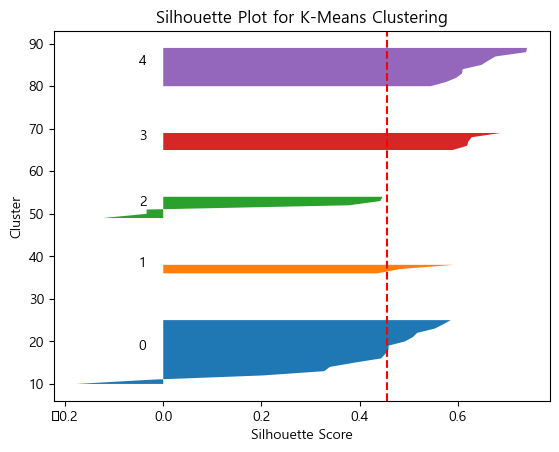

테스트 데이터와 클러스터 할당 결과:
       Annual Income (k$)  Spending Score (1-100)   Clusters
count           40.000000               40.000000  40.000000
mean            60.375000               43.900000   1.750000
std             21.452019               22.491936   1.675617
min             19.000000                1.000000   0.000000
25%             48.000000               25.500000   0.000000
50%             60.000000               49.000000   2.000000
75%             78.000000               57.500000   3.250000
max            101.000000               88.000000   4.000000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

class Clustreing:
    def __init__(self, df): #데이터셋 불러온 후 전처리
        data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

        train_x, test_x, train_y, test_y = train_test_split(data['Annual Income (k$)'], data['Spending Score (1-100)'], test_size=0.2, random_state=42)
        train_data = pd.DataFrame({
            'Annual Income (k$)' : train_x,
            'Spending Score (1-100)' : train_y
        })
        self.test_data = pd.DataFrame({
            'Annual Income (k$)' : test_x,
            'Spending Score (1-100)' : test_y
        })
        scaler = StandardScaler()
        self.scaled_train_data = scaler.fit_transform(train_data)
        self.scaled_test_data = scaler.fit_transform(self.test_data)

    def elbow(self):
        # k의 최적값을 찾기 위한 엘보우 메서드
        wcss = []
        k_range = range(1, 10)
        for k in k_range:
            kmeans_temp = KMeans(n_clusters=k, random_state=42)
            kmeans_temp.fit_predict(self.scaled_train_data)
            wcss.append(kmeans_temp.inertia_)

        plt.plot(k_range, wcss, marker='o')
        plt.title('Elbow Methods used')
        plt.xlabel('k')
        plt.ylabel('wcss')
        plt.show()
    
    def kmeans_predict(self, k):
        self.k = k
        self.model = KMeans(n_clusters=self.k, random_state=42)

        self.model.fit(self.scaled_train_data)
        self.predict = self.model.predict(self.scaled_train_data)

    def predict_plt(self):
        # 군집화 결과 시각화
        plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.scatter(self.scaled_train_data[:, 0],self.scaled_train_data[:,1], c=self.predict, cmap='viridis', s=30, 
        label="Clustered Data")
        plt.scatter(self.model.cluster_centers_[:, 0], self.model.cluster_centers_[:, 1],
        s=200, c='red', label="Centroids", marker='X')
        plt.title("연간 소득에 따른 지출")
        plt.xlabel("연간 소득")
        plt.ylabel("지출 (k$)")
        plt.legend()
        plt.show()

        # 테스트 데이터에 클러스터 레이블 추가
        self.test_data['Clusters'] = self.model.predict(self.scaled_test_data)

        # 테스트 결과 시각화
        plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.scatter(self.scaled_test_data[:, 0],self.scaled_test_data[:, 1], c=self.test_data['Clusters'], cmap='viridis', s=30, 
        label="Clustered Data")
        plt.scatter(self.model.cluster_centers_[:, 0], self.model.cluster_centers_[:, 1],
        s=200, c='red', label="Centroids", marker='X')
        plt.title("연간 소득에 따른 지출")
        plt.xlabel("연간 소득")
        plt.ylabel("지출 (k$)")
        plt.legend()
        plt.show()

    def score(self):
        # 3. 클러스터 품질 평가 -실루엣 점수 계산
        # -silhouette_score: 전체 데이터에 대한 평균 실루엣 점수를 계산
        silhouette_avg=silhouette_score(self.scaled_test_data, self.test_data['Clusters'])
        print(f"OverallSilhouette Score: {silhouette_avg:.2f}")
        # 4. 실루엣 점수 시각화 -각 데이터 포인트의 실루엣 점수를 계산
        silhouette_values=silhouette_samples(self.scaled_test_data, self.test_data['Clusters'])
        # 시각화 준비
        y_lower=10
        for i in range(self.k): # 각 클러스터에 대해 반복
            ith_cluster_silhouette_values=silhouette_values[self.test_data['Clusters']==i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i=ith_cluster_silhouette_values.shape[0]
            y_upper=y_lower+size_cluster_i
            # 클러스터별 막대 그리기
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, 
            ith_cluster_silhouette_values)
            plt.text(-0.05, y_lower+0.5*size_cluster_i, str(i)) # 클러스터 번호
            y_lower=y_upper+10 # 다음 클러스터로 이동
        # 그래프 설정
        plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
        plt.title("Silhouette Plot for K-Means Clustering")
        plt.xlabel("Silhouette Score")
        plt.ylabel("Cluster")
        plt.show()

    def test_clusters(self):
        print("테스트 데이터와 클러스터 할당 결과:")
        print(self.test_data.describe())

if __name__ == '__main__' :
    df = pd.read_csv('Mall_Customers.csv')
    cluster = Clustreing(df)
    cluster.elbow()
    cluster.kmeans_predict(5) # 엘보우 방법에서 변화가 큰 k값인 5 선택
    cluster.predict_plt()
    cluster.score()
    cluster.test_clusters()
    

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [6]:
df = pd.read_csv('Mall_Customers.csv')
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [48]:
train_x, test_x, train_y, test_y = train_test_split(data['Annual Income (k$)'], data['Spending Score (1-100)'], test_size=0.2, random_state=42)
train_data = pd.DataFrame({
    'Annual Income (k$)' : train_x,
    'Spending Score (1-100)' : train_y
})
test_data = pd.DataFrame({
    'Annual Income (k$)' : test_x,
    'Spending Score (1-100)' : test_y
})

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.fit_transform(test_data)

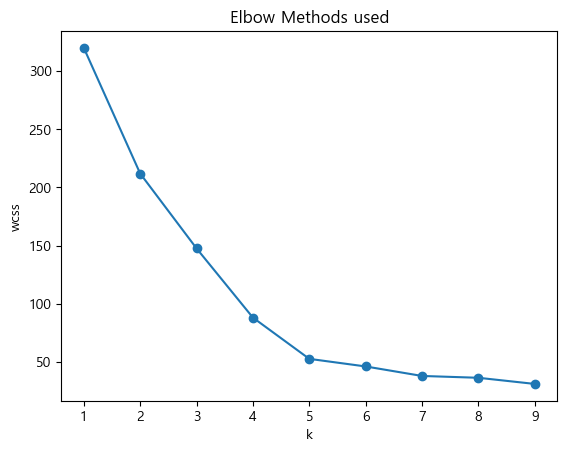

In [50]:
# k의 최적값을 찾기 위한 엘보우 메서드
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(scaled_train_data)
    wcss.append(kmeans_temp.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Methods used')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [51]:
model = KMeans(n_clusters=5, random_state=42)

model.fit(scaled_train_data)
predict = model.predict(scaled_train_data)
print(predict)

[0 3 1 1 0 3 2 2 3 0 0 3 2 0 0 0 4 0 4 0 3 0 2 1 2 0 1 3 0 4 0 3 4 2 0 0 1
 3 0 0 1 0 0 3 3 0 3 1 4 0 1 3 0 2 2 4 3 1 2 0 1 1 0 3 0 4 1 0 0 0 4 1 4 3
 0 3 0 1 3 1 1 0 3 4 2 2 4 3 0 2 4 0 0 4 0 4 2 0 0 3 4 4 3 0 0 1 2 0 0 0 4
 3 0 1 2 0 3 3 2 0 3 4 3 3 0 0 0 0 4 0 0 0 2 0 4 4 3 2 3 3 2 0 3 4 3 0 0 0
 0 0 0 3 1 4 0 0 1 0 3 0]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


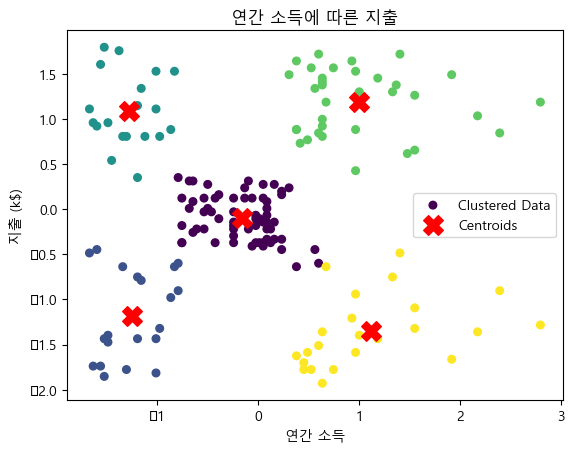

In [53]:
# 4. 군집화 결과 시각화
# 각 데이터 포인트의 클러스터에 따라 색을 지정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(scaled_train_data[:, 0],scaled_train_data[:,1], c=predict, cmap='viridis', s=30, 
label="Clustered Data")
 # 클러스터 중심 시각화
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
 s=200, c='red', label="Centroids", marker='X')
plt.title("연간 소득에 따른 지출")
plt.xlabel("연간 소득")
plt.ylabel("지출 (k$)")
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


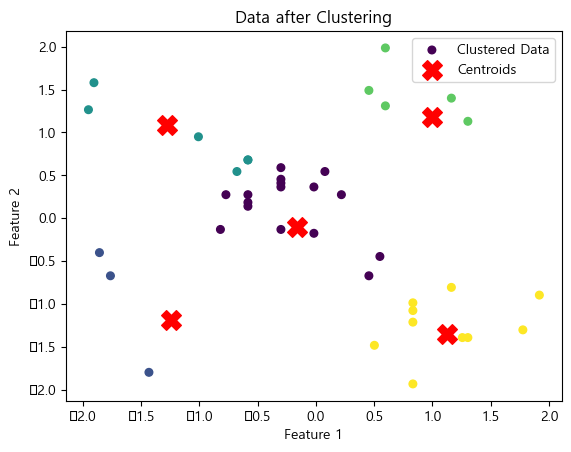

In [55]:
test_predict = model.predict(scaled_test_data)

plt.scatter(scaled_test_data[:, 0],scaled_test_data[:, 1], c=test_predict, cmap='viridis', s=30, 
label="Clustered Data")
 # 클러스터 중심 시각화
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
 s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import silhouette_score, silhouette_samples

# 3. 클러스터 품질 평가 -실루엣 점수 계산
# -silhouette_score: 전체 데이터에 대한 평균 실루엣 점수를 계산
silhouette_avg=silhouette_score(scaled_test_data, test_predict)
print(f"OverallSilhouette Score: {silhouette_avg:.2f}")

OverallSilhouette Score: 0.46


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


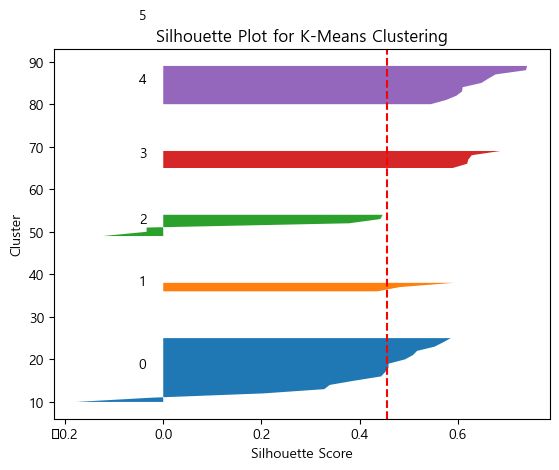

ClusterCenters:
[[-0.16294779 -0.09824232]
 [-1.24705407 -1.18175547]
 [-1.2787571   1.09163132]
 [ 0.9966282   1.18443557]
 [ 1.12090287 -1.35170375]]
SilhouetteScore for each point stored as silhouette_valuesarray.


In [ ]:
import numpy as np
# 4. 실루엣 점수 시각화 -각 데이터 포인트의 실루엣 점수를 계산
silhouette_values=silhouette_samples(scaled_test_data, test_predict)
 # 시각화 준비
y_lower=10
for i in range(6): # 각 클러스터에 대해 반복
    ith_cluster_silhouette_values=silhouette_values[test_predict==i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values.shape[0]
    y_upper=y_lower+size_cluster_i
    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, 
    ith_cluster_silhouette_values)
    plt.text(-0.05, y_lower+0.5*size_cluster_i, str(i)) # 클러스터 번호
    y_lower=y_upper+10 # 다음 클러스터로 이동
# 그래프 설정
plt.axvline(x=silhouette_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()

In [ ]:
def Question(num1, num2, num3, num4):
    answer = []
    def Npm(n1):
        npm_list = []
        # 최소공약수 계산하는 함수수
        for i in range(1, n1+1):
            if n1 % i == 0:
                npm_list.append(i)
        return npm_list
    

In [11]:
def Npm(n1):
    npm_list = []
    # 최소공약수 계산하는 함수수
    for i in range(1, n1+1):
        if n1 % i == 0:
            npm_list.append(i)
    return npm_list

answer = []
num1 = 1
num2 = 10
num3 = 1
num4 = 15
n1_npm = Npm(num2)
n2_npm = Npm(num4)
for i in n1_npm[1:]:
    if i in n2_npm:
        common = i
        exit

gcd = (num2 * num4) // common
num1 *= gcd//num2
nlist = [num1, num2] *2
print(num1)

3


In [14]:
def Npm(n1):
    npm_list = []
    # 최소공약수 계산하는 함수수
    for i in range(1, n1+1):
        if n1 % i == 0:
            npm_list.append(i)
    return npm_list
def solution(numer1, denom1, numer2, denom2):
    common = 0
    if denom1 == denom2:
        answer.append(numer1+numer2)
        answer.append(denom1)
    denom1_npm = Npm(denom1)
    denom2_npm = Npm(denom2)
    for i in denom1_npm[1:]:
        if i in denom2_npm:
            common = i
            exit
    gcd = (denom1 * denom2) // common
    numer = (numer1*(gcd//denom1)) + (numer2*(gcd//denom2))
    answer = [numer, denom1]
    return answer

print(solution(1, 2, 3, 4))


[5, 2]


In [ ]:
# 5 번째로 푼 문제인데 왤케 어렵지?


def solution(numer1, denom1, numer2, denom2):
    def Npm(n1):
        npm_list = []
        # 최소공약수 계산하는 함수수
        for i in range(1, n1+1):
            if n1 % i == 0:
                npm_list.append(i)
        return npm_list
    common = 1
    #numer = 1
    #denom = 1
    if denom1 == denom2:
        answer.append(numer1+numer2)
        answer.append(denom1)
    denom1_npm = Npm(denom1)
    denom2_npm = Npm(denom2)
    for i in denom1_npm[1:]:
        if i in denom2_npm:
            common = i
            break
    gcd = (denom1 * denom2) // common
    numer = (numer1*(gcd//denom1)) + (numer2*(gcd//denom2))
    if denom1 > denom2 :
        denom = denom1
    else:
        denom = denom2
    answer = [numer, gcd]
    return answer

In [23]:
def solution(numer1, denom1, numer2, denom2):
    while((0<numer1< 1000) & (0<denom1< 1000) & (0<numer2< 1000) & (0<denom2< 1000)):
        print('good!')
        break
solution(1,1000-1,3,4)

good!


In [76]:
def Npm(n1):
    npm_list = []
    # 최소공약수 계산하는 함수
    for i in range(1, n1+1):
        if n1 % i == 0:
            npm_list.append(i)
    return npm_list
def solution(numer1, denom1, numer2, denom2):
    while((0<numer1< 1000) & (0<denom1< 1000) & (0<numer2< 1000) & (0<denom2< 1000)):
        common = numer = 1
        answer = denom1_npm = denom2_npm = []
        if denom1 == denom2:
            numer = numer1 + numer2
            gcd = denom1
        denom1_npm = Npm(denom1)
        denom2_npm = Npm(denom2)
        for i in denom1_npm[1:]:
            if i in denom2_npm:
                common = i
                break
        gcd = (denom1 * denom2) // common
        numer = (numer1*(gcd//denom1)) + (numer2*(gcd//denom2))
        gcd_npm = Npm(gcd)
        for i in gcd_npm[:-gcd:-1]:
            if i in Npm(numer):
                gcd //= i
                numer //= i
                break
        answer = [numer, gcd]
        return answer

In [77]:
print(solution(1, 15, 1, 32))

[47, 480]


In [22]:
nlist = [1,2,2,4]
print(nlist[:-4:-1])

[4, 2, 2]


In [15]:
median = len(nlist)/2
print(type(median) == float)

True


In [39]:
nlist = [1,1,3,4]
mode_list = []
for i in range(len(nlist)):
    m = 0
    for n in nlist:
        if nlist[i] == n:
            m += 1
            #continue
    mode_list.append(m)
mode_list.sort()
mode = mode_list.pop()
if mode == mode_list.pop():
    answer = -1
else :
    answer = mode

print(answer)

-1


In [31]:
llst = []
llst.append(1)
llst.append(1)
llst.append(1)
print(llst)

[1, 1, 1]


In [126]:
def solution(array):
    mode = []
    if not (0 < len(array) < 100) or max(array) > 1000 or min(array) < 0:
        return answer
    if len(array) == 1:
        return array[0]
    mode_list = []
    set_array = list(set(array))
    for i in range(len(set_array)):
        m = array.count(set_array[i])
        mode_list.append([m, set_array[i]])
    mode_list.sort()
    mode = mode_list.pop()
    if len(mode_list) < 1:
        return mode[1]
    elif mode[0] == mode_list[-1][0]:
        return -1
    else :
        return mode[1]

print(solution([0,1,2,2]))
# 테스트 케이스
print(solution([1, 2, 3, 3, 3, 4]))  # 3
print(solution([1, 1, 2, 2]))        # -1
print(solution([1]))                 # 1
print(solution([5, 5, 5, 5]))        # 5
print(solution([100, 200, 200, 100]))  # -1
print(solution([0, 0, 1, 1, 2]))      # -1

2
3
-1
1
5
-1
-1


In [114]:
mode_list = [[1, 1], [2, 2], [1, 3]]
mode_list.sort()
print(mode_list.pop())

[2, 2]


In [100]:
nlist = [1,2,3,4,[5,6,7,8]]
#nlist[0] = [10]
print(nlist[0][0])

TypeError: 'int' object is not subscriptable

In [93]:
from collections import Counter

def solution(array):
    # 제한사항 검증
    if not (0 < len(array) < 100) or max(array) > 1000 or min(array) < 0:
        return 0  # 기본값 반환

    # 빈도 계산
    counter = Counter(array)
    mode_freq = counter.most_common()
    print(counter, mode_freq)

    # 최빈값이 여러 개인 경우 처리
    if len(mode_freq) > 1 and mode_freq[0][1] == mode_freq[1][1]:
        return -1  # 최빈값이 여러 개
    return mode_freq[0][0]  # 최빈값 반환
print(solution([1, 2, 3, 3, 3, 4]))

Counter({3: 3, 1: 1, 2: 1, 4: 1}) [(3, 3), (1, 1), (2, 1), (4, 1)]
3


In [95]:
def solution(array):
    while len(array) != 0:
        for i, a in enumerate(set(array)):
            print(i, a)
            array.remove(a)
        if i == 0: return a
    return -1

print(solution([1, 2, 32, 32, 32, 4]))

# 최빈값은 그 숫자가 몇번 반복됐는지가 아닌 그 리스트에서 가장 많이 언급된 숫자를 반환하는거다


0 32
1 1
2 2
3 4
0 32
32
